In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
%matplotlib inline

In [8]:
X = np.array([[5,2,8],[3,5,4],[5,0,2],[4,3,7],[8,0,3],[5,0,3]],dtype=float)
y = np.array([1,0,0,1,1,0],dtype=float)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=4, input_dim=3, activation='sigmoid', use_bias=True))
model.add(Dense(units=1, activation='sigmoid', use_bias=False))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(X, y, epochs=500, verbose=0)

loss, acc = model.evaluate(X, y, verbose=0)
print(f"Training Accuracy: {acc:.2f}")

X_test = np.array([
    [6, 1, 7],   # more study, balanced play, good sleep
    [3, 4, 6],   # less study, more play
    [7, 1, 4]    # heavy study, less sleep
])
y_pred = model.predict(X_test)

print("\nTest Inputs:\n", X_test)
print("Predicted Probabilities:\n", y_pred.flatten())
print("Predicted Classes (Pass=1, Fail=0):\n", (y_pred.flatten() > 0.5).astype(int))


/Users/manojravikumar/.pyenv/versions/3.10.0/lib/python3.10/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Accuracy: 0.83
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Test Inputs:
 [[6 1 7]
 [3 4 6]
 [7 1 4]]
Predicted Probabilities:
 [0.64944094 0.59998673 0.3848273 ]
Predicted Classes (Pass=1, Fail=0):
 [1 1 0]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


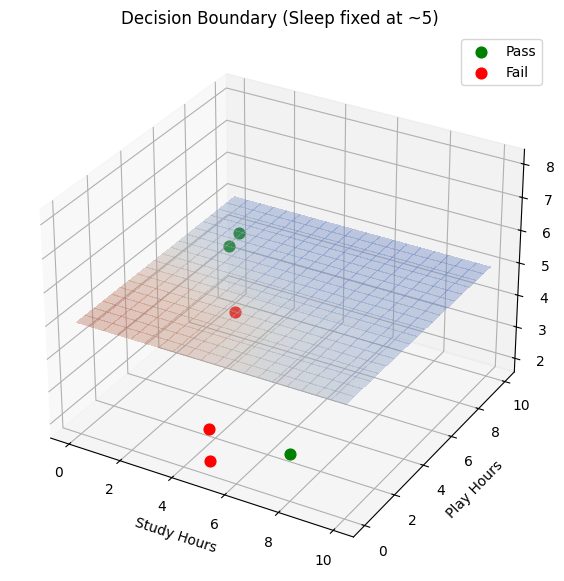

In [10]:
# -------- 3D Visualization -------- #
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Training points
for i in range(len(X)):
    if y[i] == 1:
        ax.scatter(X[i,0], X[i,1], X[i,2], color='green', s=60, label="Pass" if i==0 else "")
    else:
        ax.scatter(X[i,0], X[i,1], X[i,2], color='red', s=60, label="Fail" if i==1 else "")

# Create a grid for study, play, sleep
x1_range = np.linspace(0, 10, 20)  # study
x2_range = np.linspace(0, 10, 20)  # play
x1, x2 = np.meshgrid(x1_range, x2_range)

# Fix sleep (x3) around avg=5 for 3D surface
x3 = np.full_like(x1, 5)

# Predict probabilities on grid
grid = np.c_[x1.ravel(), x2.ravel(), x3.ravel()]
y_pred_grid = model.predict(grid).reshape(x1.shape)

# Plot decision surface
ax.plot_surface(x1, x2, x3, facecolors=plt.cm.coolwarm(y_pred_grid), 
                alpha=0.4, linewidth=0, antialiased=False)

# Labels
ax.set_xlabel("Study Hours")
ax.set_ylabel("Play Hours")
ax.set_zlabel("Sleep Hours")
ax.set_title("Decision Boundary (Sleep fixed at ~5)")

ax.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step


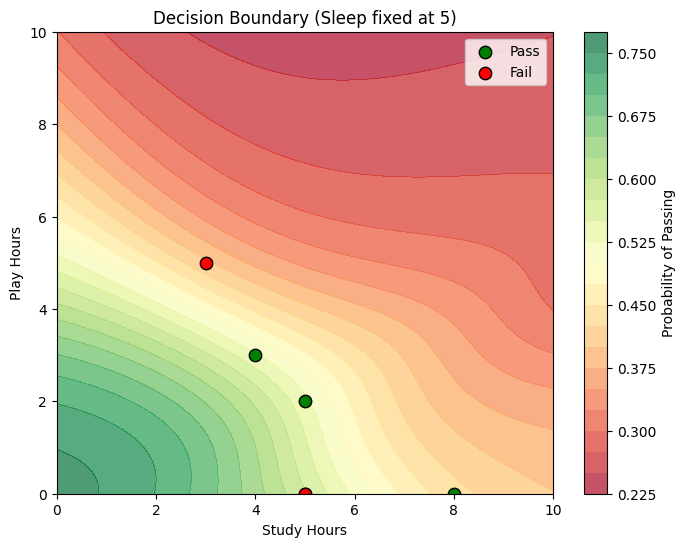

In [11]:
# Fix sleep hours for visualization
fixed_sleep = 5  

# Grid for study vs play
x1_range = np.linspace(0, 10, 100)  # study
x2_range = np.linspace(0, 10, 100)  # play
x1, x2 = np.meshgrid(x1_range, x2_range)
x3 = np.full_like(x1, fixed_sleep)

# Predict probabilities
grid = np.c_[x1.ravel(), x2.ravel(), x3.ravel()]
y_pred_grid = model.predict(grid).reshape(x1.shape)

# Plot contour
plt.figure(figsize=(8,6))
contour = plt.contourf(x1, x2, y_pred_grid, levels=20, cmap="RdYlGn", alpha=0.7)
plt.colorbar(contour, label="Probability of Passing")

# Plot training points
for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i,0], X[i,1], color='green', s=80, edgecolor="black", label="Pass" if i==0 else "")
    else:
        plt.scatter(X[i,0], X[i,1], color='red', s=80, edgecolor="black", label="Fail" if i==1 else "")

plt.xlabel("Study Hours")
plt.ylabel("Play Hours")
plt.title(f"Decision Boundary (Sleep fixed at {fixed_sleep})")
plt.legend()
plt.show()